In [1]:
import csv
import datetime
import time
import os
from selenium import webdriver

import matplotlib.pyplot as plt
import collections
from openpyxl import load_workbook

import math
import statistics
import numpy as np

In [55]:
ytrs_view = []
ytrs_emotion = []

In [65]:
def get_filename_from_folder(folder_path, ext=""):
    file_name_list = []
    for file_name in os.listdir(folder_path):
        name = os.path.join(folder_path + "/"+ file_name)
        
        # get file extension
        file_ext = os.path.splitext(file_name)[1]
        # if user give ext and the file extension is not the same, pass
        if ext and file_ext != ext:
            continue
        
        # os.rename(name, os.path.join(folder_path + "/"+ file_name[1:]))
#         
        file_name_list.append(name)
        
    return sorted(file_name_list)

def filename_process(target):
    
    split_file_name = [ x.split("_") for x in filename_list]
    
    for i in split_file_name:
        try:
            ytr = i[1][1:]
            types = i[3]
            start = i[4]
            end = i[5].split(".")[0]
        
            if target == ytr:
                yield ytr, types, start, end
        except:
            pass

def get_file_by_ytr_and_date(ytr, types, start):
    file_list = []
    for fytr, ftypes, fstart, fend in filename_process(ytr):
        if fytr == ytr and ftypes == types and fstart == start:
            name = f"./yt_/{fytr}_單主題_{ftypes}_{fstart}_{fend}.xlsx"
            file_list.append(name)
    return file_list

In [50]:
filename_list = get_filename_from_folder("./yt_")
ytr_list = list(set())

In [47]:
wb = load_workbook(filename="./yt_/龍龍_單主題_趨勢_20201201_20211216.xlsx")

In [66]:
for filename in get_file_by_ytr_and_date(ytr, '趨勢', DATE):
    print(filename)

./yt_/谷阿莫_單主題_趨勢_20201201_20211222.xlsx


In [67]:
import openpyxl
openpyxl.Workbook.encoding="cp936"
ytrs_view = []
ytrs_emotion = []


# opview 資料（聲量）
DATE = "20201201"
for ytr in ytrs:
    for filename in get_file_by_ytr_and_date(ytr, '趨勢', DATE):
        wb = load_workbook(filename=filename)
        op_view_data = collections.OrderedDict()
        op_view_data['name'] = ytr
        opview_wb = wb['日趨勢']
        for i in range(2, opview_wb.max_row+1):
            day = opview_wb.cell(column=1, row=i).value
            qty = opview_wb.cell(column=2, row=i).value
            
            op_view_data[day] = qty

        ytrs_view.append(op_view_data)
    
    for filename in get_file_by_ytr_and_date(ytr, '情緒', DATE):
        # opview 資料（情緒）
        wb = load_workbook(filename=filename)
        op_view_emotion = collections.OrderedDict(
            {'good': collections.OrderedDict(), 'bad': collections.OrderedDict()})
        op_view_emotion['name'] = ytr
        opview_wb = wb['日情緒趨勢']
        for i in range(2, opview_wb.max_row+1):

            day = opview_wb.cell(column=1, row=i).value
            good = opview_wb.cell(column=2, row=i).value
            bad = opview_wb.cell(column=3, row=i).value
            total = opview_wb.cell(column=4, row=i).value


            op_view_emotion["good"][day] = good
            op_view_emotion["bad"][day] = bad

        ytrs_emotion.append(op_view_emotion)

/home/bobo/anaconda3/envs/ml/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


龍龍


/home/bobo/anaconda3/envs/ml/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


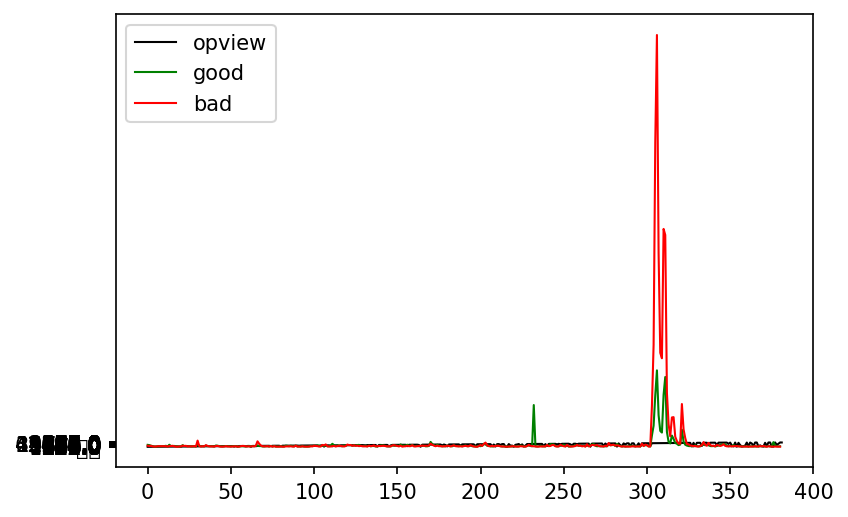

Toyz


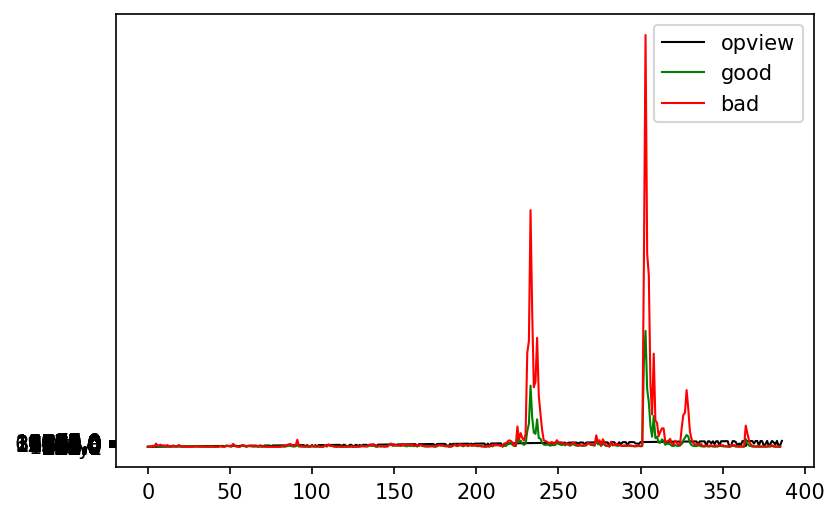

谷阿莫


/home/bobo/anaconda3/envs/ml/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bobo/anaconda3/envs/ml/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bobo/anaconda3/envs/ml/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33707 (\N{CJK UNIFIED IDEOGRAPH-83AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


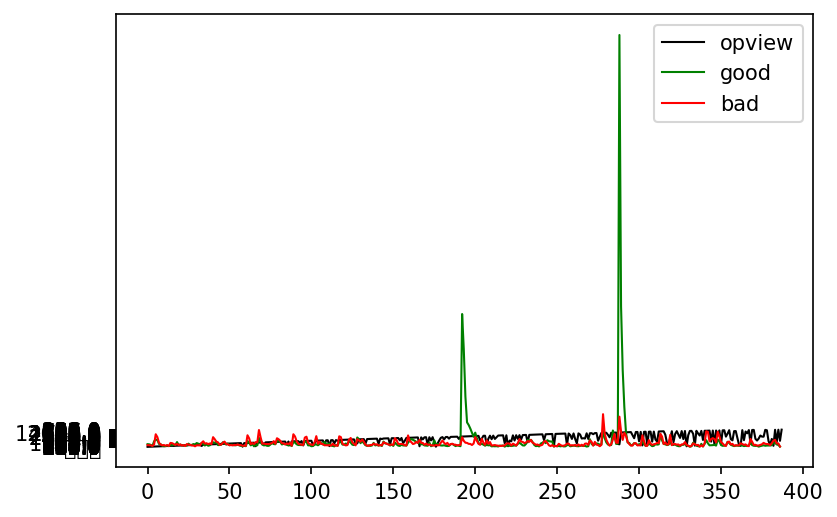

In [69]:


for view, emotion in zip(ytrs_view, ytrs_emotion):
    print(view['name'])
    fig, ax1 = plt.subplots(dpi=150)
    ax1.plot(view.values(), figure=fig, linewidth=1, c='black', label="opview")
    ax1.plot(emotion["good"].values(), figure=fig, linewidth=1, c='g', label="good")
    ax1.plot(emotion["bad"].values(), figure=fig, linewidth=1, c='r', label="bad")
    ax1.legend()
    plt.show()
